# Homewrok Session #2

#### *Personal information*

**First name**: Ariadna Uxue

**Last Name**: Palomino Ylla

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#para que todas las imágenes salgan en el misnmo notebook

## Question 1

[Oscilador armónico subamortiguado](https://www.notion.so/Oscilador-arm-nico-subamortiguado-18b2d5d946194370b6643a869b3919e9)

1.  De la misma manera en que se hizo para el oscilador armónico sobre y críticamente amortiguado, resolver la ecuación diferencial para el caso subamortiguado de manera simbólica (no es necesario mostrar las soluciones) con coeficientes de amortiguamiento y condiciones iniciales

    $$\gamma = 0.1 (2\omega), 0.5(2\omega), 0.9(2\omega) $$

$$
\frac{d^2 x}{dt^2} + \gamma \dot{x}+ \omega^2 x = 0 
$$

In [32]:
w_num = 0.5
x0_num = 5
x0dot_num = 1
t_plot = np.linspace(0, 50, 1000)

In [33]:
t = sp.symbols('t')
g = sp.symbols('gamma')
w = sp.symbols('omega')
x = sp.Function('x')(t)

eq = sp.Eq(sp.diff(x, (t, 2)) + g*sp.diff(x, t) + w**2*x,  0)
eq

Eq(gamma*Derivative(x(t), t) + omega**2*x(t) + Derivative(x(t), (t, 2)), 0)

In [34]:
#subamortiguado
g_sub1=0.1*2*w
g_sub2=0.9*2*w
g_sub3=0.5*2*w

In [35]:
#ecuacion sobreamortiguda 1
eq_sub1 = eq.subs(g, g_sub1)
sol_sub1 = sp.dsolve(eq_sub1, x)
sol_sub1

Eq(x(t), C1*exp(omega*t*(-0.1 - 0.99498743710662*I)) + C2*exp(omega*t*(-0.1 + 0.99498743710662*I)))

In [36]:
#ecuacion sobreamortiguda 2
eq_sub2 = eq.subs(g, g_sub2)
sol_sub2 = sp.dsolve(eq_sub2, x)
sol_sub2

Eq(x(t), C1*exp(omega*t*(-0.9 - 0.435889894354067*I)) + C2*exp(omega*t*(-0.9 + 0.435889894354067*I)))

In [37]:
#ecuacion sobreamortiguda 2
eq_sub3= eq.subs(g, g_sub3)
sol_sub3= sp.dsolve(eq_sub3, x)
sol_sub3

Eq(x(t), C1*exp(omega*t*(-0.5 - 0.866025403784439*I)) + C2*exp(omega*t*(-0.5 + 0.866025403784439*I)))

In [38]:
#condiciones iniciales
x0 = sp.symbols('x_0')
x0dot = sp.symbols('\dot{x_0}')
Ics = {x.subs(t, 0): x0, sp.diff(x, t).subs(t, 0): x0dot}

In [39]:
sol_sub1 = sp.dsolve(eq_sub1, x, ics = Ics)
sol_sub1

Eq(x(t), (0.502518907629606*I*\dot{x_0}/omega + 0.5*x_0 + 0.0502518907629606*I*x_0)*exp(omega*t*(-0.1 - 0.99498743710662*I)) - 1.00503781525921e-14*I*(50000000000000.0*\dot{x_0} + omega*x_0*(5000000000000.0 + 49749371855331.0*I))*exp(omega*t*(-0.1 + 0.99498743710662*I))/omega)

In [40]:
sol_sub2 = sp.dsolve(eq_sub2, x, ics = Ics)
sol_sub2

Eq(x(t), (1.14707866935281*I*\dot{x_0}/omega + 0.5*x_0 + 1.03237080241753*I*x_0)*exp(omega*t*(-0.9 - 0.435889894354067*I)) - 1.14707866935281e-15*I*(1.0e+15*\dot{x_0} + omega*x_0*(900000000000000.0 + 435889894354067.0*I))*exp(omega*t*(-0.9 + 0.435889894354067*I))/omega)

In [41]:
sol_sub3 = sp.dsolve(eq_sub3, x, ics = Ics)
sol_sub3

Eq(x(t), (0.577350269189626*I*\dot{x_0}/omega + 0.5*x_0 + 0.288675134594813*I*x_0)*exp(omega*t*(-0.5 - 0.866025403784439*I)) - 5.77350269189626e-16*I*(1.0e+15*\dot{x_0} + omega*x_0*(500000000000000.0 + 866025403784439.0*I))*exp(omega*t*(-0.5 + 0.866025403784439*I))/omega)

In [42]:
x_sub_num1 = sp.lambdify(t, sol_sub1.subs([(w, w_num), (x0, x0_num), (x0dot, x0dot_num)]).rhs, 'numpy')
x_sub_plot1 = x_sub_num1(t_plot)

In [43]:
x_sub_num2 = sp.lambdify(t, sol_sub2.subs([(w, w_num), (x0, x0_num), (x0dot, x0dot_num)]).rhs, 'numpy')
x_sub_plot2 = x_sub_num2(t_plot)

In [44]:
x_sub_num3 = sp.lambdify(t, sol_sub3.subs([(w, w_num), (x0, x0_num), (x0dot, x0dot_num)]).rhs, 'numpy')
x_sub_plot3 = x_sub_num3(t_plot)

2. Graficar las soluciones obtenidas en 1 en una misma gráfica (los valores de la frecuencia y las condiciones iniciales quedan a elección propia; elegir valores razonables) y añadir una leyenda (las soluciones que se obtienen en 1 son complejas, sin embargo, no es necesario preocuparse por este detalle puesto que `matplotlib` solo toma la parte real al momento de graficar.)

C:\Users\Ariadna\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


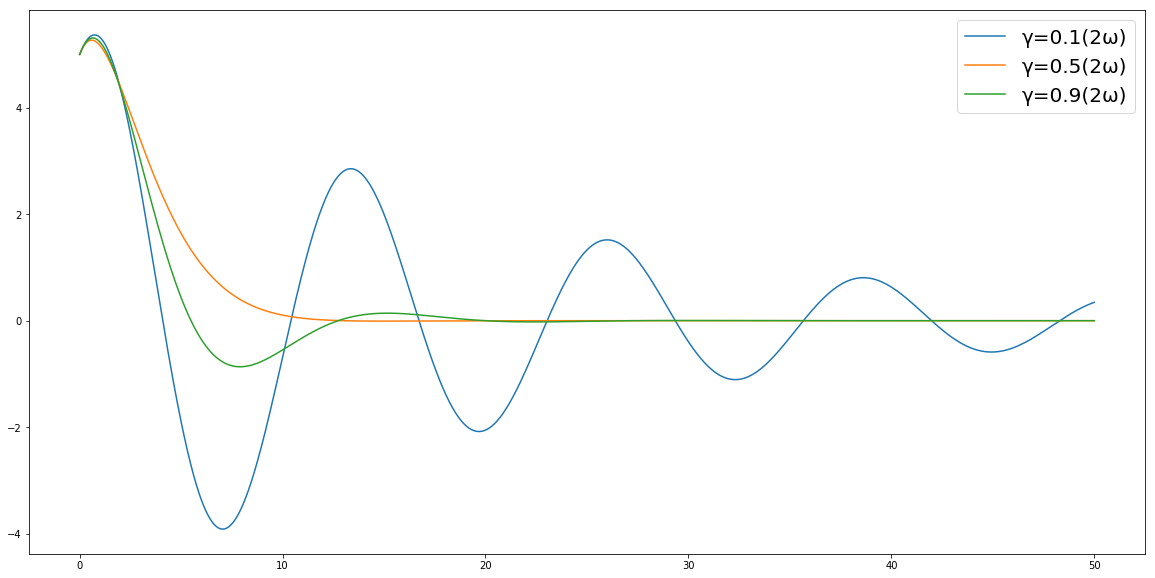

In [51]:
plt.figure(figsize=(20,10))
plt.plot(t_plot, x_sub_plot1,t_plot, x_sub_plot2,t_plot, x_sub_plot3)
plt.legend(['γ=0.1(2ω)','γ=0.5(2ω)','γ=0.9(2ω)'],prop={'size': 20})

3. A partir de la gráfica hecha en 2, hacer un breve análisis de como influye el coeficiente de amortiguamiento en el movimiento de la partícula.

- Conforme el coeficiente de amortiguamiento el cuerpo aumenta, la amplitud de la oscilación disminuye más rápido en el tiempo. Algo muy amortiguado no oscila sino que regresa a su posicion de equilibrio tras el desplazamiento inicial.

## Question 2

[Dos péndulos acoplados](https://www.notion.so/Dos-p-ndulos-acoplados-0e761b506494488899b3bfdbad1d5d78)

Consideremos un sistema de dos péndulos acoplados por un resorte como se ve en la figura, con sus respectivas ecuaciones de movimiento. 

Si bien es posible resolver estas ecuaciones analíticamente, para hacerlo usando `sympy` , convertiremos este sistema de dos ecuaciones diferenciales de segundo orden en un sistema de **cuatro** **ecuaciones diferenciales de** **primer orden**

In [67]:
x0_n =4.
x1_n =4.
u_n = 6.
v_n = 8.
m_num = 1.
g_num = 9.8
l_num = 5.
k_num = 3.
t_plot = np.linspace(0, 50, 1000)

In [68]:
t = sp.symbols('t')
x1 = sp.Function('x1')(t)
x0 = sp.Function('x0')(t)
u = sp.Function('u')(t)
v = sp.Function('v')(t)

In [69]:
g = sp.symbols('g')
m = sp.symbols('m')
l = sp.symbols('l')
k = sp.symbols('k')

In [70]:
eq1 = sp.Eq(v, sp.diff(x1,t))
eq1

Eq(v(t), Derivative(x1(t), t))

In [71]:
eq2 = sp.Eq(u, sp.diff(x0,t))
eq2

Eq(u(t), Derivative(x0(t), t))

In [72]:
eq3= sp.Eq(m*sp.diff(v,t),-1*(m*g/l)*x1-1*k*(x1-x0))
eq3

Eq(m*Derivative(v(t), t), -g*m*x1(t)/l - k*(-x0(t) + x1(t)))

In [73]:
eq4= sp.Eq(m*sp.diff(u,t),-1*(m*g/l)*x0-1*k*(x0-x1))
eq4

Eq(m*Derivative(u(t), t), -g*m*x0(t)/l - k*(x0(t) - x1(t)))

In [74]:
eqs=[eq1,eq2,eq3,eq4]

In [75]:
#condiciones iniciales
x0_0 = sp.symbols('x0^0')
x1_0 = sp.symbols('x1^0')
u_0 = sp.symbols('u_0')
v_0 = sp.symbols('v_0')
Ics2 = {x1.subs(t, 0): x1_0, x0.subs(t, 0): x0_0, u.subs(t, 0): u_0, v.subs(t, 0): v_0}

In [76]:
sol_sist = sp.dsolve(eqs, [x1, x0, u, v], ics = Ics2)
x1_sol, x0_sol, u_sol, v_sol = sol_sist

In [77]:
x1_sol

Eq(x1(t), (u_0/4 - v_0/4 - x0^0*sqrt((g*m + 2*k*l)/l)/4 + x1^0*sqrt((g*m + 2*k*l)/l)/4)*exp(t*sqrt(g*m/l + 2*k))/sqrt(g*m/l + 2*k) - (u_0/4 - v_0/4 + x0^0*sqrt((g*m + 2*k*l)/l)/4 - x1^0*sqrt((g*m + 2*k*l)/l)/4)*exp(-t*sqrt(g*m/l + 2*k))/sqrt(g*m/l + 2*k) - l*sqrt(g*m/l)*(u_0/4 + v_0/4 - x0^0*sqrt(g*m/l)/4 - x1^0*sqrt(g*m/l)/4)*exp(t*sqrt(g*m/l))/(g*m) + l*sqrt(g*m/l)*(u_0/4 + v_0/4 + x0^0*sqrt(g*m/l)/4 + x1^0*sqrt(g*m/l)/4)*exp(-t*sqrt(g*m/l))/(g*m))

In [78]:
x0_sol

Eq(x0(t), -(u_0/4 - v_0/4 - x0^0*sqrt((g*m + 2*k*l)/l)/4 + x1^0*sqrt((g*m + 2*k*l)/l)/4)*exp(t*sqrt(g*m/l + 2*k))/sqrt(g*m/l + 2*k) + (u_0/4 - v_0/4 + x0^0*sqrt((g*m + 2*k*l)/l)/4 - x1^0*sqrt((g*m + 2*k*l)/l)/4)*exp(-t*sqrt(g*m/l + 2*k))/sqrt(g*m/l + 2*k) - (u_0/4 + v_0/4 - x0^0*sqrt(g*m/l)/4 - x1^0*sqrt(g*m/l)/4)*exp(t*sqrt(g*m/l))/sqrt(g*m/l) + (u_0/4 + v_0/4 + x0^0*sqrt(g*m/l)/4 + x1^0*sqrt(g*m/l)/4)*exp(-t*sqrt(g*m/l))/sqrt(g*m/l))

In [79]:
u_sol

Eq(v(t), -(u_0/4 - v_0/4 - x0^0*sqrt((g*m + 2*k*l)/l)/4 + x1^0*sqrt((g*m + 2*k*l)/l)/4)*exp(t*sqrt(g*m/l + 2*k)) - (u_0/4 - v_0/4 + x0^0*sqrt((g*m + 2*k*l)/l)/4 - x1^0*sqrt((g*m + 2*k*l)/l)/4)*exp(-t*sqrt(g*m/l + 2*k)) + (u_0/4 + v_0/4 - x0^0*sqrt(g*m/l)/4 - x1^0*sqrt(g*m/l)/4)*exp(t*sqrt(g*m/l)) + (u_0/4 + v_0/4 + x0^0*sqrt(g*m/l)/4 + x1^0*sqrt(g*m/l)/4)*exp(-t*sqrt(g*m/l)))

In [80]:
v_sol

Eq(u(t), (u_0/4 - v_0/4 - x0^0*sqrt((g*m + 2*k*l)/l)/4 + x1^0*sqrt((g*m + 2*k*l)/l)/4)*exp(t*sqrt(g*m/l + 2*k)) + (u_0/4 - v_0/4 + x0^0*sqrt((g*m + 2*k*l)/l)/4 - x1^0*sqrt((g*m + 2*k*l)/l)/4)*exp(-t*sqrt(g*m/l + 2*k)) + (u_0/4 + v_0/4 - x0^0*sqrt(g*m/l)/4 - x1^0*sqrt(g*m/l)/4)*exp(t*sqrt(g*m/l)) + (u_0/4 + v_0/4 + x0^0*sqrt(g*m/l)/4 + x1^0*sqrt(g*m/l)/4)*exp(-t*sqrt(g*m/l)))

In [81]:
x1_sol = x1_sol.subs([(m,m_num),(k,k_num),(l,l_num),(g,g_num)])
x0_sol = x0_sol.subs([(m,m_num),(k,k_num),(l,l_num),(g,g_num)])
u_sol = u_sol.subs([(m,m_num),(k,k_num),(l,l_num),(g,g_num)])
v_sol = v_sol.subs([(m,m_num),(k,k_num),(l,l_num),(g,g_num)])

In [82]:
x0_num = sp.lambdify(t, x0_sol.subs([(x0_0, x0_n), (x1_0, x1_n), (u_0,u_n), (v_0,v_n)]).rhs, 'numpy')
x1_num = sp.lambdify(t, x1_sol.subs([(x0_0, x0_n), (x1_0, x1_n), (u_0,u_n), (v_0,v_n)]).rhs, 'numpy')
v_num = sp.lambdify(t, v_sol.subs([(x0_0, x0_n), (x1_0, x1_n), (u_0,u_n), (v_0,v_n)]).rhs, 'numpy')
u_num = sp.lambdify(t, u_sol.subs([(x0_0, x0_n), (x1_0, x1_n), (u_0,u_n), (v_0,v_n)]).rhs, 'numpy')

In [83]:
x1_plot = x1_num(t_plot)
x0_plot = x0_num(t_plot)
u_plot = u_num(t_plot)
v_plot = v_num(t_plot)

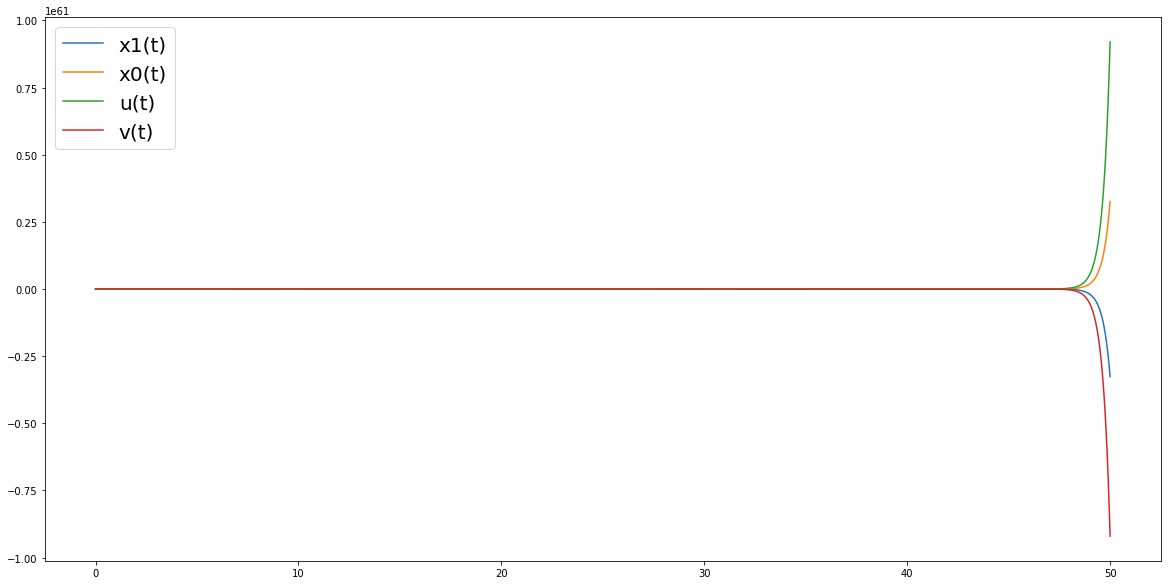

In [84]:
plt.figure(figsize=(20,10))
plt.plot(t_plot, x1_plot,t_plot, x0_plot,t_plot, u_plot, t_plot, v_plot)
plt.legend(['x1(t)','x0(t)','u(t)','v(t)'],prop={'size': 20})